# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [2]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 110.7 MB/s eta 0:00:00


In [3]:
# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


## 1. Superposition Example

┌───┐
q: ┤ H ├
   └───┘

Superposition Measurement Counts: {'1': 494, '0': 530}


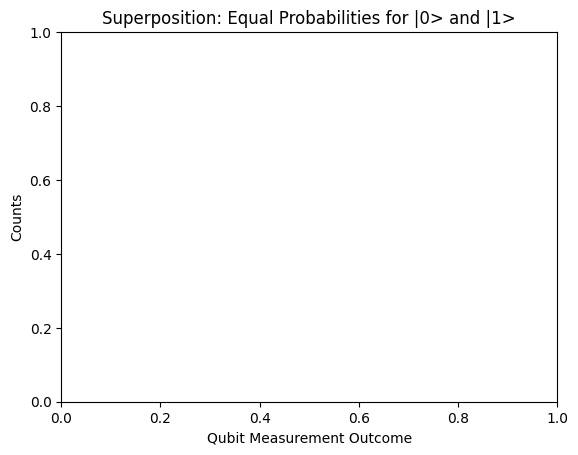

In [4]:
# ===========================
# Task 1: Superposition
# ===========================

# Create a 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate to create superposition
qc_super.h(0)

# Draw the circuit
display(qc_super.draw('text'))  # Use display for Jupyter notebooks

# Measure all qubits
qc_super.measure_all()

# Simulate the circuit
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()

# Print the counts
print("Superposition Measurement Counts:", counts_super)

# Plot histogram correctly
fig = plot_histogram(counts_super, legend=['Qubit 0'], bar_labels=True)
plt.title("Superposition: Equal Probabilities for |0> and |1>")
plt.xlabel("Qubit Measurement Outcome")
plt.ylabel("Counts")
plt.show()



## 2. Entanglement Example

Entanglement Measurement Counts: {'11': 516, '00': 508}


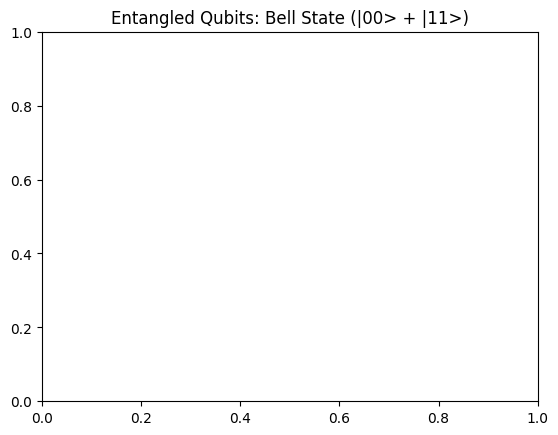

In [6]:
# ===========================
# Entanglement Example
# ===========================

# Create a 2-qubit circuit
qc_ent = QuantumCircuit(2)

# Apply Hadamard on qubit 0
qc_ent.h(0)

# Apply CNOT (control = qubit 0, target = qubit 1)
qc_ent.cx(0, 1)

# Draw the circuit
qc_ent.draw('text')

# Measure both qubits
qc_ent.measure_all()

# Run the simulation
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()

# Print and plot the results
print("Entanglement Measurement Counts:", counts_ent)
plot_histogram(counts_ent)
plt.title("Entangled Qubits: Bell State (|00> + |11>)")
plt.show()
